# Import Libraries & Packages

In [1]:
import pandas as pd
import dask.dataframe as dd
import seaborn as sns

In [2]:
import sys
sys.path.append('../lending_club')
import config

# Import Approved Loan Data

In [3]:
from data_prep import get_lending_club_data
accepted_loans = get_lending_club_data(config.APPROVED_LOANS_CSV)

### Get Total Length of Data

In [5]:
totalLength = len(accepted_loans['hardship_amount'])

# Count NA's

### DK Columns

In [7]:
df = accepted_loans[['hardship_amount',
'hardship_dpd',
'hardship_end_date',
'hardship_flag',
'hardship_last_payment_amount',
'hardship_length',
'hardship_loan_status',
'hardship_payoff_balance_amount',
'hardship_reason',
'hardship_start_date',
'hardship_status',
'hardship_type',
'home_ownership',
'il_util',
'initial_list_status',
'inq_fi',
'inq_last_12m',
'inq_last_6mths',
'installment',
'int_rate',
'issue_d',
'last_credit_pull_d',
'last_fico_range_high',
'last_fico_range_low',
'last_pymnt_amnt',
'last_pymnt_d',
'loan_amnt',
'loan_status',
'max_bal_bc']]

In [ ]:
for i in df.columns:
    print(i, totalLength - sum(df[i].isnull()))

### Jess columns

In [ ]:
df2 = accepted_loans [['acc_now_delinq','acc_open_past_24mths','addr_state','all_util',
                'annual_inc','annual_inc_joint','application_type','avg_cur_bal',
                'bc_open_to_buy','bc_util','chargeoff_within_12_mths','collection_recovery_fee',
                'collections_12_mths_ex_med','debt_settlement_flag','debt_settlement_flag_date',
                'deferral_term','delinq_2yrs','delinq_amnt','disbursement_method',
                'dti','dti_joint','earliest_cr_line','emp_length','emp_title',
                'fico_range_high','fico_range_low','funded_amnt','funded_amnt_inv',
                'grade']]

In [ ]:
for i in df2.columns:
    print(i, total_Length - sum(df2[i].isnull()))

### Eugene Columns

In [ ]:
df3 = accepted_loans[[
'member_id',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_last_delinq',
'mths_since_last_major_derog',
'mths_since_last_record',
'mths_since_rcnt_il',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'next_pymnt_d',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'open_acc']]

In [ ]:
for i in df3.columns:
    print(i, totalLength - sum(df3[i].isnull()))

In [2]:
accepted.loc[accepted['id'].str.len()>20,:].compute()


NameError: name 'accepted_loans' is not defined

# Check for Potential Imputation

#### Home Ownership Status provided by borrower

In [9]:
df['home_ownership'].value_counts().compute()

MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

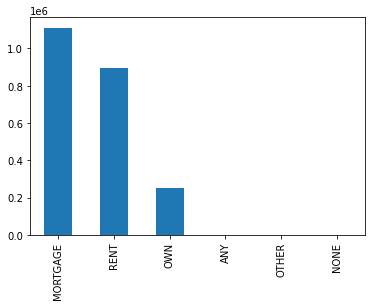

In [102]:
df['home_ownership'].value_counts().compute().plot(kind = 'bar')

In [14]:
sum(df['home_ownership'].isnull())

33

* NA's are from the 33 odd columns. Full dataset once they are removed.

#### Ratio of total current balance to credit limit on all install accounts

In [15]:
df['il_util'].value_counts().compute()

78.0     22659
75.0     22425
81.0     22330
83.0     22286
72.0     22023
         ...  
272.0        1
273.0        1
216.0        1
230.0        1
252.0        1
Name: il_util, Length: 280, dtype: int64

In [43]:
df[['loan_status', 'il_util']].dropna().compute()

,loan_status,il_util
0,Fully Paid,36.0
1,Fully Paid,73.0
2,Fully Paid,73.0
3,Current,70.0
4,Fully Paid,84.0
...,...,...
14840,Current,106.0
14841,Current,77.0
14842,Current,46.0
14843,Charged Off,78.0


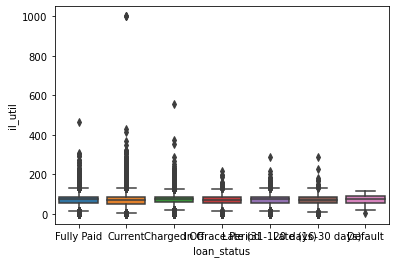

In [47]:
sns.boxplot(x = 'loan_status', y = 'il_util', data = df[['loan_status', 'il_util']].dropna().compute())

In [54]:
df[['loan_status', 'il_util']].dropna().groupby('loan_status').mean().compute()

,il_util
loan_status,
Charged Off,73.369746
Current,67.552937
Fully Paid,70.854736
In Grace Period,70.483513
Late (16-30 days),70.153823
Late (31-120 days),71.402184
Default,72.225806


In [53]:
df['il_util'].mean().compute()

69.14097957909681

In [16]:
sum(df['il_util'].isnull())

1068883

#### Initial listing status of the loan: W or F

In [17]:
df['initial_list_status'].value_counts().compute()

w    1535467
f     725201
Name: initial_list_status, dtype: int64

In [71]:
# Proportion of Whole loan
1535467 / totalLength

0.6791995049323196

In [72]:
# Proportion of Fractional loan
725201 / totalLength

0.3207858978254975

In [18]:
sum(df['initial_list_status'].isnull())

33

* NA's are from the 33 odd columns. Full dataset once they are removed. Impute with mean?

#### Number of personal finance inquiries

In [19]:
df['inq_fi'].value_counts().compute()

0.0     697142
1.0     352169
2.0     172982
3.0      83887
4.0      41460
5.0      21374
6.0      11043
7.0       6059
8.0       3423
9.0       1946
10.0      1132
11.0       689
12.0       411
13.0       264
14.0       183
15.0       115
16.0        81
17.0        50
19.0        32
18.0        28
20.0        20
21.0        11
23.0         9
22.0         8
24.0         7
28.0         4
25.0         3
27.0         2
29.0         1
31.0         1
32.0         1
38.0         1
48.0         1
Name: inq_fi, dtype: int64

In [75]:
df['inq_fi'].mean().compute()

1.0128666175703942

In [20]:
sum(df['inq_fi'].isnull())

866162

* Definitely left-skewed towards 0

#### Number of credit inquiries in last 12 months

In [21]:
df['inq_last_12m'].value_counts().compute()

0.0     400090
1.0     339411
2.0     235736
3.0     153565
4.0      96535
5.0      59861
6.0      37765
7.0      24088
8.0      15619
9.0      10201
10.0      6558
11.0      4540
12.0      3026
13.0      2129
14.0      1515
15.0      1014
16.0       768
17.0       532
18.0       376
19.0       307
20.0       201
21.0       162
22.0       127
23.0        88
24.0        63
26.0        50
25.0        44
27.0        41
28.0        20
29.0        19
30.0        18
31.0        15
32.0        11
33.0         8
34.0         8
35.0         5
40.0         5
39.0         3
36.0         3
38.0         2
41.0         2
37.0         1
42.0         1
45.0         1
46.0         1
49.0         1
51.0         1
67.0         1
Name: inq_last_12m, dtype: int64

In [76]:
df['inq_last_12m'].mean().compute()

2.0366673407250286

In [22]:
sum(df['inq_last_12m'].isnull())

866163

* Definitely left-skewed towards 0

#### Number of credit inquiries in the past 6 months (excluding auto & mortgage inquiries)

In [23]:
df['inq_last_6mths'].value_counts().compute()

0.0     1381722
1.0      584390
2.0      200212
3.0       69009
4.0       17380
5.0        6232
6.0        1231
7.0         195
8.0         122
9.0          50
10.0         24
11.0         15
12.0         15
15.0          9
14.0          6
13.0          6
18.0          4
16.0          3
17.0          2
19.0          2
24.0          2
20.0          1
25.0          1
27.0          1
28.0          1
31.0          1
32.0          1
33.0          1
Name: inq_last_6mths, dtype: int64

In [77]:
df['inq_last_6mths'].mean().compute()

0.5768353889477218

In [24]:
sum(df['inq_last_6mths'].isnull())

63

* Definitely left-skewed towards 0

#### Interest Rate on the loan

In [25]:
df['int_rate'].value_counts().compute()

11.99    53869
5.32     47171
10.99    44165
13.99    43025
11.49    32010
         ...  
11.16        1
24.40        1
16.83        1
18.72        1
24.59        1
Name: int_rate, Length: 673, dtype: int64

In [78]:
df['int_rate'].mean().compute()

13.09282911511111

In [83]:
df[['int_rate', 'loan_status']].groupby('loan_status').mean().compute()

,int_rate
loan_status,
Charged Off,15.710714
Current,12.768128
Default,16.181750
Fully Paid,12.623288
In Grace Period,15.461246
Late (16-30 days),15.411380
Late (31-120 days),15.637190
Does not meet the credit policy. Status:Charged Off,14.597148
Does not meet the credit policy. Status:Fully Paid,13.978642


In [26]:
sum(df['int_rate'].isnull())

33

* NA's are from the 33 odd columns. Full dataset once they are removed.

#### The month which the loan was funded

In [27]:
df['issue_d'].value_counts().compute()

2016-03-01    61992
2015-10-01    48631
2018-05-01    46311
2018-10-01    46305
2018-08-01    46079
              ...  
2007-08-01       74
2007-07-01       63
2008-09-01       57
2007-09-01       53
2007-06-01       24
Name: issue_d, Length: 139, dtype: int64

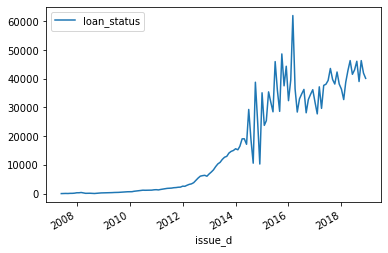

In [112]:
df[['issue_d', 'loan_status']].groupby(['issue_d']).count().compute().plot()

In [28]:
sum(df['issue_d'].isnull())

33

* NA's are from the 33 odd columns. Full dataset once they are removed.

#### The listed amount of the loan applied for the borrower

In [29]:
df['loan_amnt'].value_counts().compute()

10000.0    187236
20000.0    131006
15000.0    123226
12000.0    121681
35000.0     86285
            ...  
550.0           1
725.0           1
850.0           1
950.0           1
750.0           1
Name: loan_amnt, Length: 1572, dtype: int64

In [79]:
df['loan_amnt'].mean().compute()

15046.931227849467

In [84]:
df[['loan_amnt', 'loan_status']].groupby('loan_status').mean().compute()

,loan_amnt
loan_status,
Charged Off,15565.055444
Current,15942.815920
Default,14350.625000
Fully Paid,14134.369808
In Grace Period,17672.558084
Late (16-30 days),17391.118648
Late (31-120 days),16946.614571
Does not meet the credit policy. Status:Charged Off,9527.233903
Does not meet the credit policy. Status:Fully Paid,8853.231891


In [30]:
sum(df['loan_amnt'].isnull())

33

* NA's are from the 33 odd columns. Full dataset once they are removed.

#### Current status of the loan

In [31]:
df['loan_status'].value_counts().compute()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

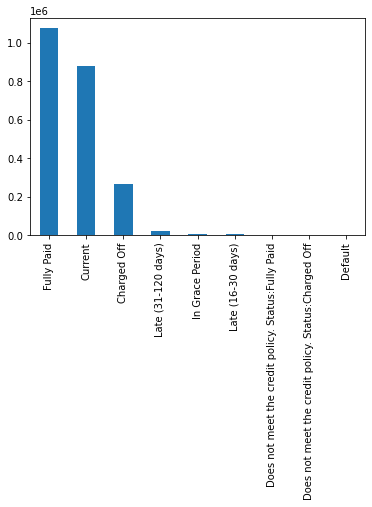

In [101]:
df['loan_status'].value_counts().compute().plot(kind = 'bar')

In [32]:
sum(df['loan_status'].isnull())

33

* NA's are from the 33 odd columns. Full dataset once they are removed.

#### Maximum current balance owed on all revolving accounts

In [33]:
df['max_bal_bc'].value_counts().compute()

0.0          35917
8.0            572
3000.0         533
2000.0         504
4000.0         447
             ...  
30546.0          1
30544.0          1
30538.0          1
30537.0          1
1170668.0        1
Name: max_bal_bc, Length: 33726, dtype: int64

In [80]:
df['max_bal_bc'].mean().compute()

5806.392904752036

In [87]:
df[['max_bal_bc', 'loan_status']].dropna().groupby('loan_status').mean().compute()

,max_bal_bc
loan_status,
Charged Off,5154.822512
Current,6002.291806
Fully Paid,5647.842994
In Grace Period,5508.800782
Late (16-30 days),5297.993012
Late (31-120 days),5159.172660
Default,4529.342105


In [34]:
sum(df['max_bal_bc'].isnull())

866162

# EDA Questions

In [6]:
for i in accepted_loans.columns:
    print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

#### What are the interest rates for each loan grade?

In [7]:
accepted_loans.groupby(['grade', 'sub_grade'])['int_rate'].mean().compute()

grade  sub_grade
A      A1            5.600265
       A2            6.552337
       A3            7.094535
       A4            7.560239
       A5            8.195006
B      B1            9.078554
       B2            9.974970
       B3           10.705015
       B4           11.372778
       B5           12.013545
C      C1           12.783783
       C2           13.537632
       C3           14.104219
       C4           14.878059
       C5           15.768243
D      D1           16.658169
       D2           17.599961
       D3           18.388456
       D4           19.072871
       D5           20.063591
E      E1           20.333383
       E2           21.013473
       E3           21.881358
       E4           22.778776
       E5           24.108853
F      F1           24.547291
       F2           24.986190
       F3           25.778108
       F4           26.347711
       F5           27.102973
G      G1           27.850828
       G2           27.653650
       G3           28.

#### Which states are the most common?

In [8]:
accepted_loans['addr_state'].value_counts().compute()

CA    314533
NY    186389
TX    186335
FL    161991
IL     91173
NJ     83132
PA     76939
OH     75132
GA     74196
VA     62954
NC     62730
MI     58770
MD     54008
AZ     53777
MA     51784
CO     48183
WA     47060
MN     39517
IN     37515
MO     36084
CT     35785
TN     35483
NV     32657
WI     29877
SC     28003
AL     27284
OR     26789
LA     25759
KY     21887
OK     20691
KS     19109
AR     17074
UT     14993
MS     12639
NM     11986
NH     11142
HI     10668
RI     10005
WV      8351
NE      7819
DE      6458
MT      6299
DC      5356
AK      5231
ME      4974
VT      4937
WY      4748
SD      4549
ID      4308
ND      3591
IA        14
Name: addr_state, dtype: int64

#### What loan durations are most common?

In [10]:
accepted_loans['term'].value_counts().compute()

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

#### What are the most common loan purposes?

In [9]:
accepted_loans['purpose'].value_counts().compute()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64